In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv('Inmuebles_Disponibles_Para_La_Venta.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448 entries, 0 to 447
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Codigo                  448 non-null    int64 
 1   Ciudad                  448 non-null    object
 2   Departamento            448 non-null    object
 3   Barrio                  59 non-null     object
 4   Direccion               448 non-null    object
 5   Area Terreno            448 non-null    int64 
 6   Area Construida         448 non-null    int64 
 7   Detalle Disponibilidad  448 non-null    object
 8   Estrato                 448 non-null    object
 9   Precio                  448 non-null    int64 
 10  Tipo de Inmueble        448 non-null    object
 11  Datos Adicionales       77 non-null     object
dtypes: int64(4), object(8)
memory usage: 42.1+ KB


In [5]:
df.isnull().sum()

Codigo                      0
Ciudad                      0
Departamento                0
Barrio                    389
Direccion                   0
Area Terreno                0
Area Construida             0
Detalle Disponibilidad      0
Estrato                     0
Precio                      0
Tipo de Inmueble            0
Datos Adicionales         371
dtype: int64

In [6]:
df = df.dropna()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38 entries, 1 to 384
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Codigo                  38 non-null     int64 
 1   Ciudad                  38 non-null     object
 2   Departamento            38 non-null     object
 3   Barrio                  38 non-null     object
 4   Direccion               38 non-null     object
 5   Area Terreno            38 non-null     int64 
 6   Area Construida         38 non-null     int64 
 7   Detalle Disponibilidad  38 non-null     object
 8   Estrato                 38 non-null     object
 9   Precio                  38 non-null     int64 
 10  Tipo de Inmueble        38 non-null     object
 11  Datos Adicionales       38 non-null     object
dtypes: int64(4), object(8)
memory usage: 3.9+ KB


In [8]:
df = df.drop_duplicates()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38 entries, 1 to 384
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Codigo                  38 non-null     int64 
 1   Ciudad                  38 non-null     object
 2   Departamento            38 non-null     object
 3   Barrio                  38 non-null     object
 4   Direccion               38 non-null     object
 5   Area Terreno            38 non-null     int64 
 6   Area Construida         38 non-null     int64 
 7   Detalle Disponibilidad  38 non-null     object
 8   Estrato                 38 non-null     object
 9   Precio                  38 non-null     int64 
 10  Tipo de Inmueble        38 non-null     object
 11  Datos Adicionales       38 non-null     object
dtypes: int64(4), object(8)
memory usage: 3.9+ KB


In [10]:
df.describe()

,Codigo,Area Terreno,Area Construida,Precio
count,38.000000,3.800000e+01,3.800000e+01,3.800000e+01
mean,13661.947368,9.918090e+06,6.135489e+04,1.489517e+13
std,3753.164581,3.603443e+07,2.247096e+05,2.702030e+13
min,2363.000000,0.000000e+00,0.000000e+00,2.060800e+11
25%,12115.250000,0.000000e+00,0.000000e+00,3.355200e+11
50%,12707.500000,0.000000e+00,0.000000e+00,5.986771e+12
75%,17369.500000,4.405983e+06,0.000000e+00,1.732475e+13
max,18871.000000,2.187863e+08,1.198100e+06,1.471331e+14


array([[<Axes: title={'center': 'Codigo'}>,
        <Axes: title={'center': 'Area Terreno'}>],
       [<Axes: title={'center': 'Area Construida'}>,
        <Axes: title={'center': 'Precio'}>]], dtype=object)

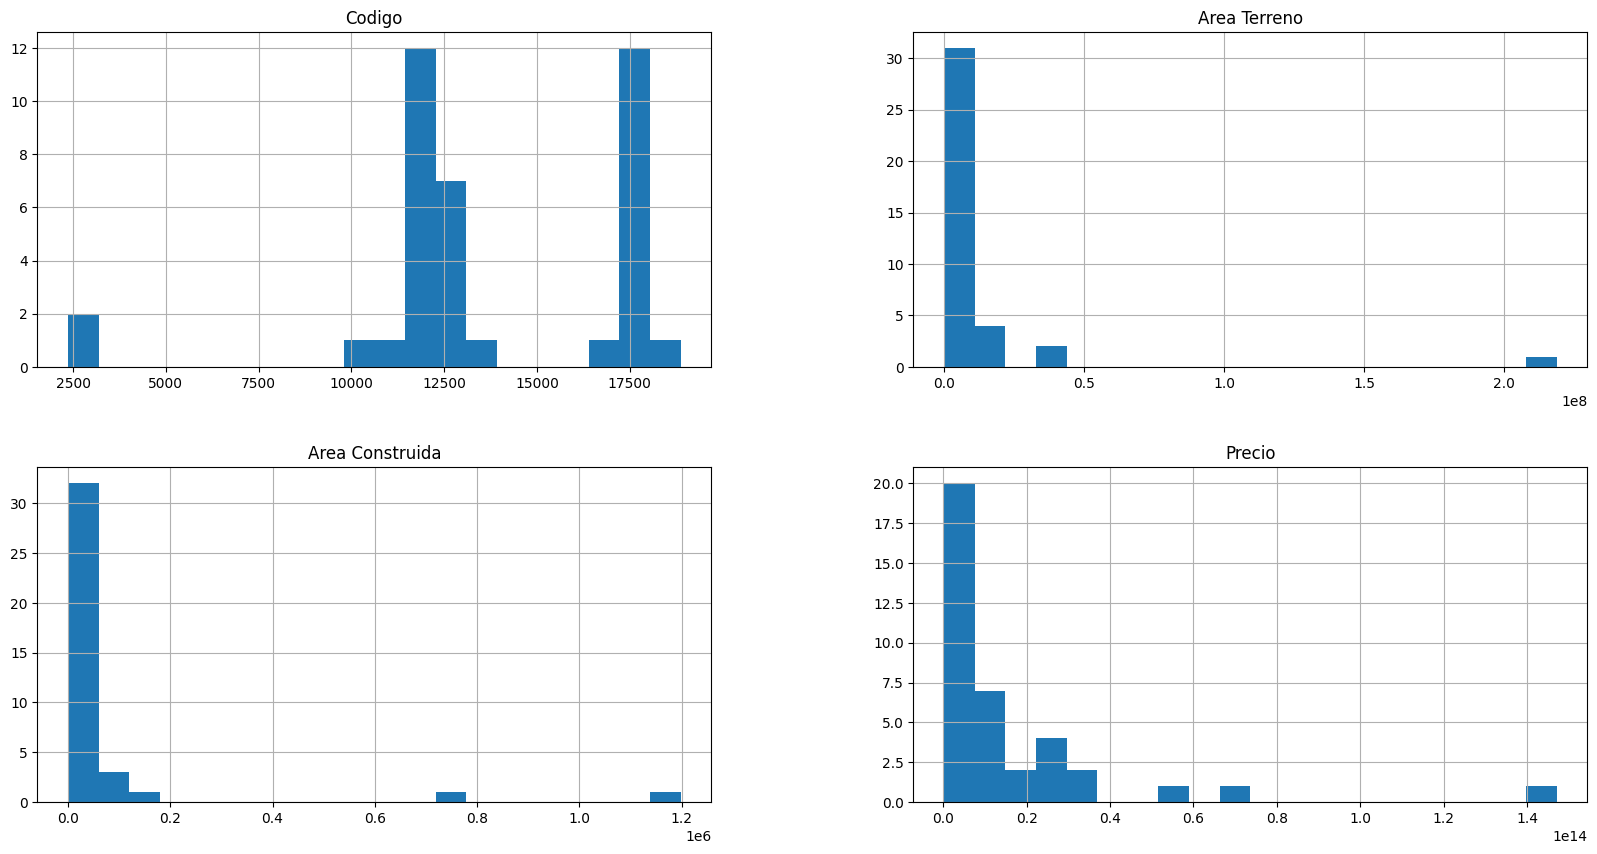

In [11]:
df.hist(bins=20,figsize=(20,10))

<Axes: >

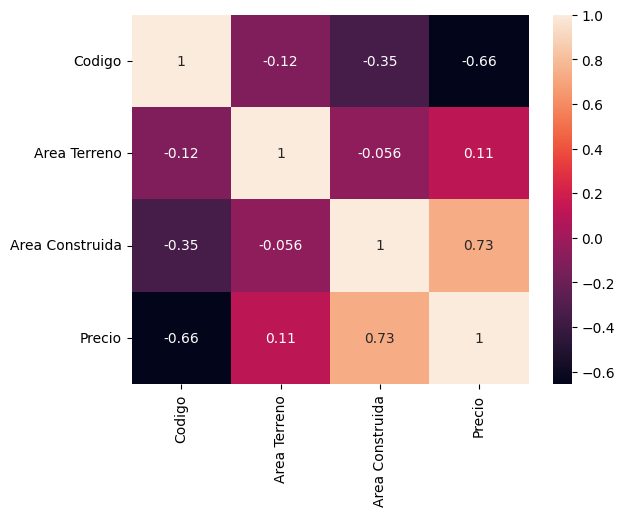

In [12]:
df_numeric = df.select_dtypes(include='number')

correlacion = df_numeric.corr()
sns.heatmap(correlacion, xticklabels=correlacion.columns, 
            yticklabels=correlacion.columns, annot=True)

In [419]:
mapeo = {
    'COMERCIAL': 'Ciudad',
    'INDUSTRIAL': 'Ciudad',
    'RURAL': 'Campo',
    'UNO': 'Ciudad',
    'DOS': 'Ciudad',
    'TRES': 'Ciudad',
    'CUATRO': 'Ciudad',
    'CINCO': 'Ciudad',
    'SEIS': 'Ciudad'
}

df['Ubicacion'] = df['Estrato'].map(mapeo)


In [420]:
#df.head(10)
df.loc[:20, ['Codigo', 'Ciudad', 'Departamento', 'Estrato',
             'Precio', 'Ubicacion']].head(20)


,Codigo,Ciudad,Departamento,Estrato,Precio,Ubicacion
1,2363,BOGOTA,CUNDINAMARCA,TRES,32857503970000,Ciudad
2,2575,SOGAMOSO,BOYACÁ,COMERCIAL,147133144000000,Ciudad
11,10106,BARRANQUILLA,ATLÁNTICO,DOS,8000330000000,Ciudad
12,11335,CALI,VALLE DEL CAUCA,RURAL,16677840600000,Campo
14,11786,VILLA RICA,CAUCA,INDUSTRIAL,70903412109800,Ciudad
15,11787,SANTANDER DE QUILICHAO,CAUCA,RURAL,14162132860000,Campo
16,12112,CALIMA EL DARIEN,VALLE DEL CAUCA,RURAL,24066502680000,Campo
17,12113,CALIMA EL DARIEN,VALLE DEL CAUCA,RURAL,27000920840000,Campo
18,12114,CALIMA EL DARIEN,VALLE DEL CAUCA,RURAL,27045246000000,Campo
19,12115,CALIMA EL DARIEN,VALLE DEL CAUCA,RURAL,10428866940000,Campo


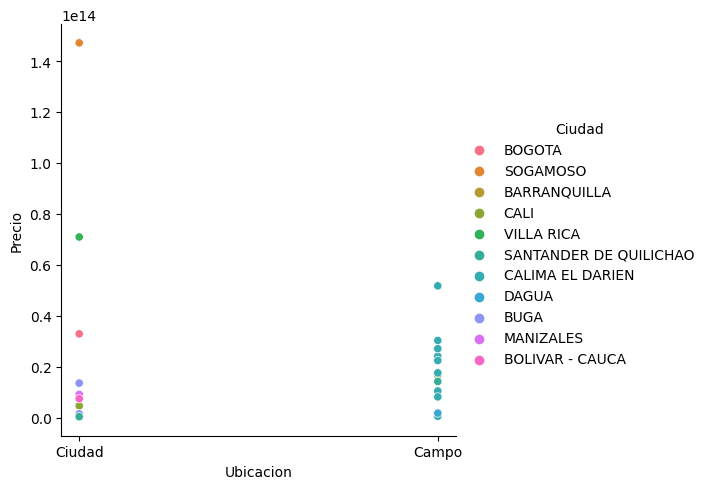

In [421]:
sns.relplot(x='Ubicacion' ,y='Precio',hue='Ciudad',data=df)

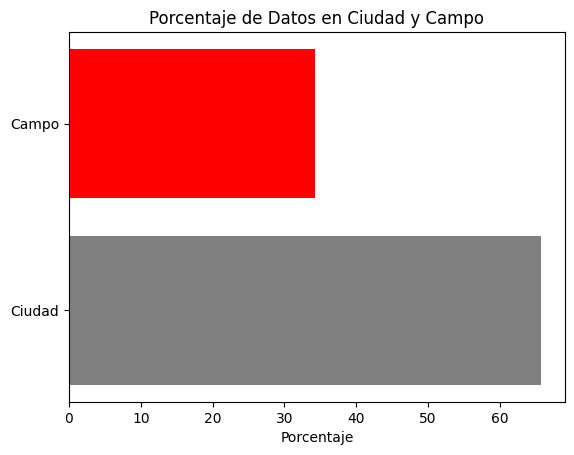

In [422]:
porcentaje_ciudad = (df['Ubicacion'] == 'Ciudad').mean() * 100
porcentaje_campo = (df['Ubicacion'] == 'Campo').mean() * 100
etiquetas = ['Ciudad', 'Campo']
porcentajes = [porcentaje_ciudad, porcentaje_campo]

fig, ax = plt.subplots()

ax.barh(etiquetas, porcentajes, color='gray')

ax.barh('Campo', porcentaje_campo, color='red')

ax.set_xlabel('Porcentaje')
ax.set_title('Porcentaje de Datos en Ciudad y Campo')

plt.show()